In [140]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import pymysql
from sqlalchemy import create_engine
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
from scipy.stats import norm
from scipy.stats import kstest
import pylab
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

pd.set_option('display.max_columns', None)

## Data collection and exploration

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# Change capitalization to lowercase and replace spaces with underscores:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ", "_")
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [9]:
round((customer_df.isna().sum()/len(customer_df)*100),2)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [10]:
customer_df.customer.unique()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

In [11]:
numericals = customer_df.select_dtypes(np.number)

In [12]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [13]:
for column in numericals:
    print(numericals[column].unique())

[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866]
[56274     0 48767 ... 66367 71941 21941]
[ 69  94 108 106  73  67 101  71  93 110  70  64  72  74  79  61 111 139
  80  63 237  65  62 117  91  90  66  99 103 172  92 104 113 124 105 100
 112  97  95 102 186  77  96  76 119  88 109 107 130  85  98 133  86  78
  83  68 192 118  89 140 127 168 126  82 115 217 114 138  81 255 150 123
 116 190 159  84 152 136 245 135 128 225 132 153 121 154 161 156 171  87
 244 183 176 230 129 177 196 131 276 253 137 180 203 147 165 198 125 193
 271 188 142 206 182 189 160 295 210 134 239 256 173 285 148 197 199 214
 175 167 194 164 181 222 215 283 169 248 223 273 151 213 145 185 287 297
 201 149 146 235 268 211 187 141 242 170 122 143 155 166 212 249 240 191
 195 216 144 179 232 158 207 184 238 229 220 178 204 281 234 218 275 209
 261 157 205 228 284 231 208 296 202 162 274 219 247 290 226 163 298 266
 254 252 174 286]
[32 13 18 12 14  0 17 23 27  9 21 11 31  8  4 30 22 

In [14]:
for column in numericals:
    print(len(numericals[column].unique()))

8041
5694
202
36
100
6
9
5106


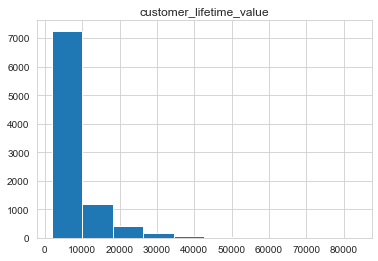

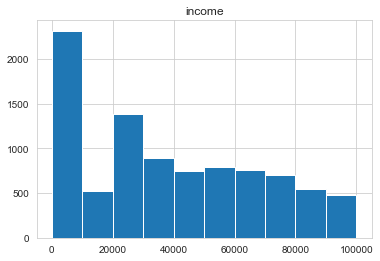

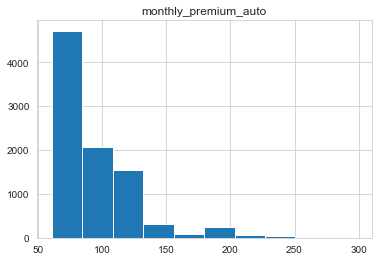

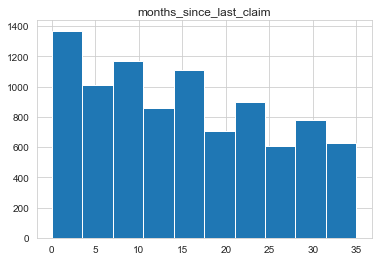

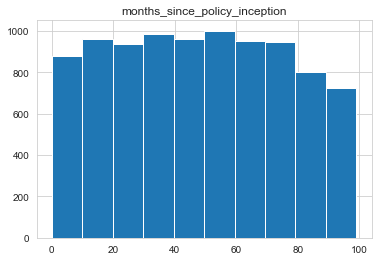

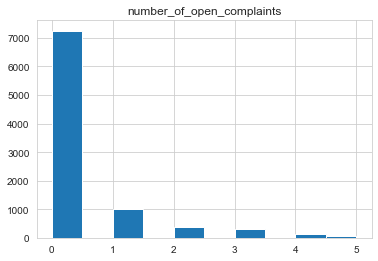

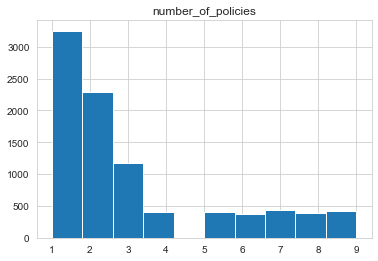

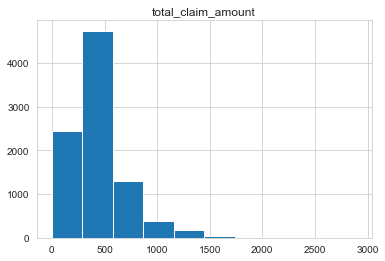

In [15]:
for column in numericals:
    numericals[column].hist()
    plt.title(column)
    plt.show()

In [16]:
def check_dtypes(numericals):
    test = numericals.dtypes
    x=0
    for i in range (len(numericals.columns)):
        print(test[x]," ", numericals.iloc[0][numericals.columns[i]]," ",numericals.columns[i])
        x+=1
    return()

In [17]:
check_dtypes(numericals)

float64   2763.519279   customer_lifetime_value
int64   56274.0   income
int64   69.0   monthly_premium_auto
int64   32.0   months_since_last_claim
int64   5.0   months_since_policy_inception
int64   0.0   number_of_open_complaints
int64   1.0   number_of_policies
float64   384.811147   total_claim_amount


()

In [18]:
# Discrete: number_of_policies, number_of_open_complaints, months_since_policy_inception, months_since_last_claim
# Continuous: monthly_premium_auto, total_claim_amount,income,customer_lifetime_value
# Why monthly_premium_auto is in continous: it's calculated based 
# on a lot of different criteria (type of cars, policies taken, age of the main driver, how many accidents you had and when etc.)
# so with all these combinations of inputs we can get any number of monthly_premium_auto.

In [19]:
numericals['income'] = numericals['income'].astype(float)
numericals['monthly_premium_auto'] = numericals['income'].astype(float)
check_dtypes(numericals)

float64   2763.519279   customer_lifetime_value
float64   56274.0   income
float64   56274.0   monthly_premium_auto
int64   32.0   months_since_last_claim
int64   5.0   months_since_policy_inception
int64   0.0   number_of_open_complaints
int64   1.0   number_of_policies
float64   384.811147   total_claim_amount


()

In [20]:
def to_dict(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df1 = df.select_dtypes(include='int64')
            discrete = df1.to_dict()
        else:
            df2 = df.select_dtypes(include='float64')
            continuous = df2.to_dict()
    return continuous, discrete

In [21]:
continuous, discrete = to_dict(numericals)

In [22]:
type(discrete)

dict

In [23]:
discrete.keys()

dict_keys(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'])

In [24]:
continuous.keys()

dict_keys(['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount'])

In [25]:
cat = customer_df.select_dtypes(np.object)
cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [26]:
for column in cat:
    print(cat[column].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [27]:
for column in cat:
    print(len(cat[column].unique()))

9134
5
2
3
5
5
2
3
3
3
9
4
4
6
3


In [28]:
check_dtypes(cat)

object   BU79786   customer
object   Washington   state
object   No   response
object   Basic   coverage
object   Bachelor   education
object   Employed   employmentstatus
object   F   gender
object   Suburban   location_code
object   Married   marital_status
object   Corporate Auto   policy_type
object   Corporate L3   policy
object   Offer1   renew_offer_type
object   Agent   sales_channel
object   Two-Door Car   vehicle_class
object   Medsize   vehicle_size


()

In [29]:
# customer => continuous but would be better to set it as the index
# all the other variables are discrete
# text in cat variable is already clean

In [30]:
# not sure if we're meant to add the cat variables to the discrete variable
cat_dict = cat.to_dict()

In [31]:
cat_dict.keys()

dict_keys(['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'])

In [32]:
discrete_df = pd.DataFrame.from_dict(discrete)

In [33]:
discrete_df.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


In [34]:
continuous_df = pd.DataFrame.from_dict(continuous)

In [35]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274.0,56274.0,384.811147
1,6979.535903,0.0,0.0,1131.464935
2,12887.431650,48767.0,48767.0,566.472247
3,7645.861827,0.0,0.0,529.881344
4,2813.692575,43836.0,43836.0,138.130879


In [36]:
# 10. What should we do with the customer_id column? => should be set as the index
customer_df = customer_df.set_index('customer')
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [37]:
cat = cat.set_index('customer')
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [38]:
# Lab | Cleaning categorical data

In [39]:
# 3. Plot a correlation matrix, what can you see?

In [40]:
continuous_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.024366,0.226451
income,0.024366,1.000000,1.000000,-0.355254
monthly_premium_auto,0.024366,1.000000,1.000000,-0.355254
total_claim_amount,0.226451,-0.355254,-0.355254,1.000000


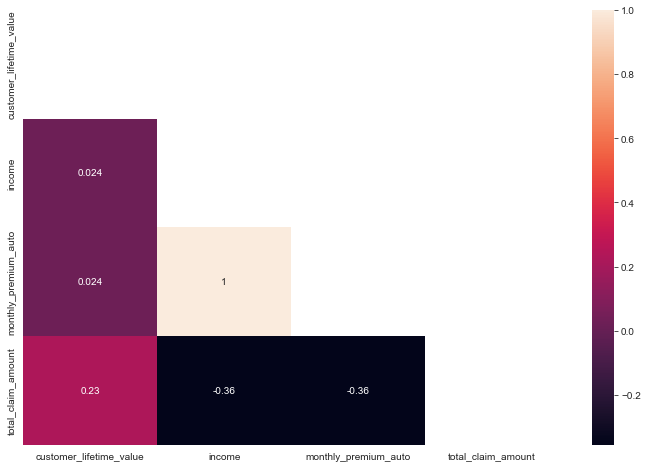

In [41]:
mask = np.zeros_like(continuous_df.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(continuous_df.corr(), mask=mask, annot=True)
plt.show()

# Perfect positive correlation between income and monthly_premium_auto
# not any significicant positive or negative correlation between the other categories

In [42]:
discrete_df.corr()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
months_since_last_claim,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,0.005354,-0.001158,1.000000,0.001498
number_of_policies,0.009136,-0.013333,0.001498,1.000000


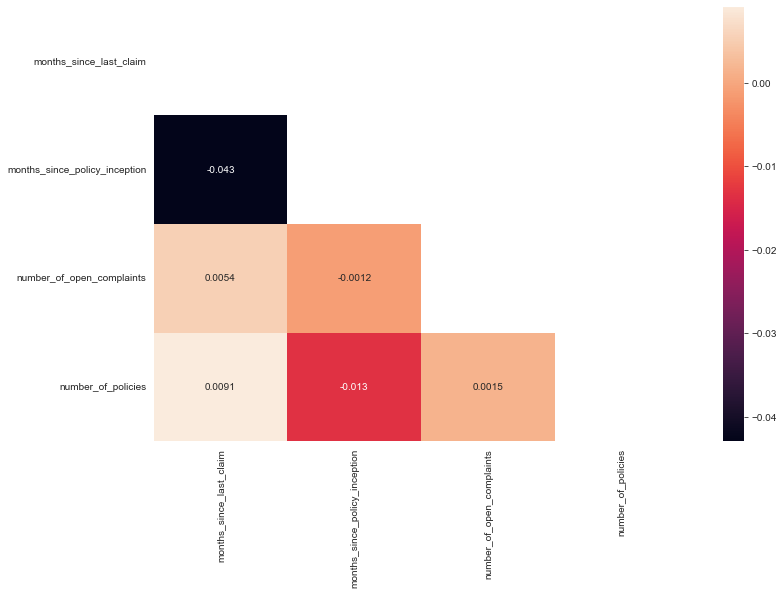

In [43]:
mask = np.zeros_like(discrete_df.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(discrete_df.corr(), mask=mask, annot=True)
plt.show()

# Very, very low correlations, the maximujm is 4,3% between months_since policy inception and months_since_last_claim

In [44]:
# Create a function to plot every discrete variables

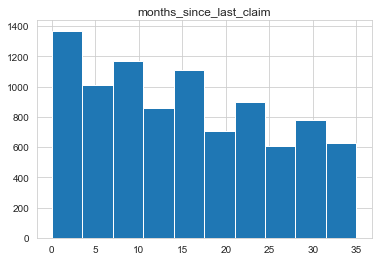

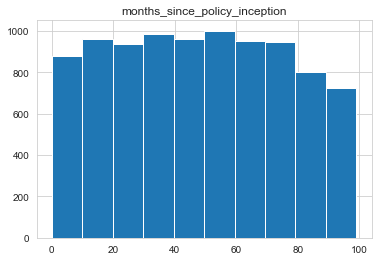

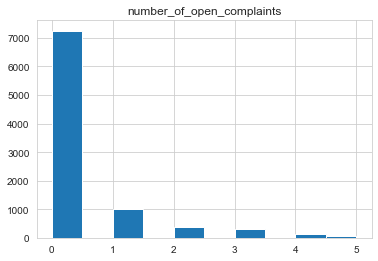

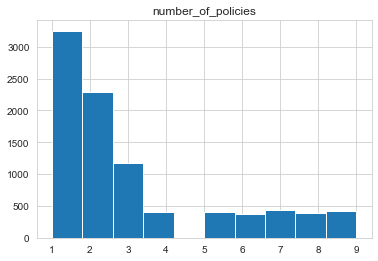

In [45]:
for column in discrete_df:
    discrete_df[column].hist()
    plt.title(column)
    plt.show()

In [46]:
# Observations: no normal distributions
# Some discrete values are evenly distributed between each unique values, so maybe not relevant if they're all identical in proportion   

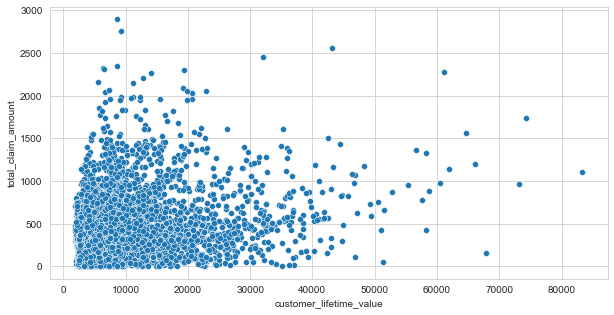

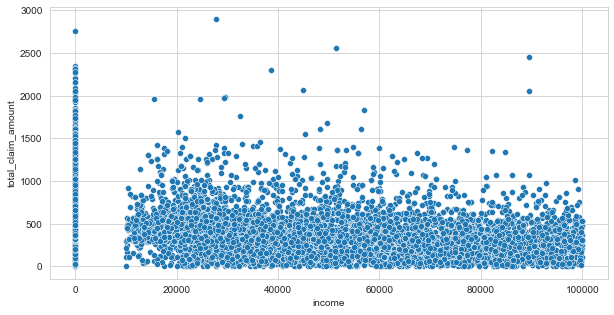

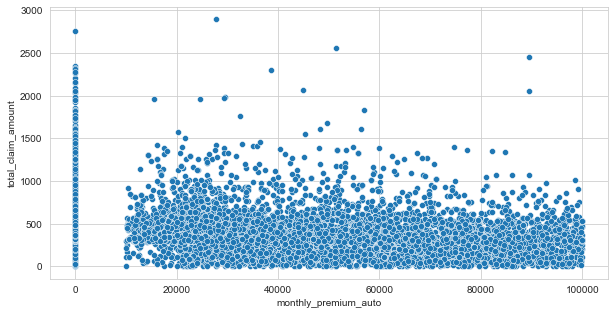

In [47]:
# Do the same with continuous variables 
cols_to_include = continuous_df.loc[:, continuous_df.columns != 'total_claim_amount']
for column in cols_to_include:
    plt.figure(figsize=(10,5))
    sns.scatterplot(continuous_df[column],continuous_df['total_claim_amount'])
    plt.show()

In [48]:
# Observations: there seems to be not a lot of correlation between the monthly_premium_auto, the income and the target
# However we can see a correlation between the customer_lifetime_value and the target, it follows a y = 3x pattern.

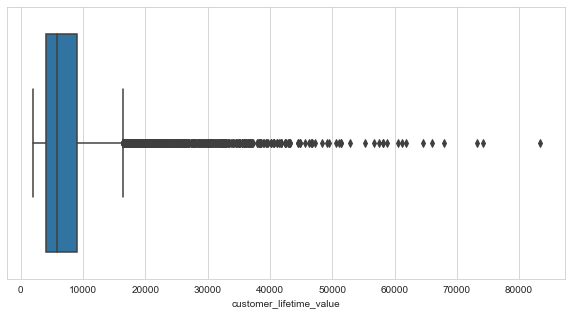

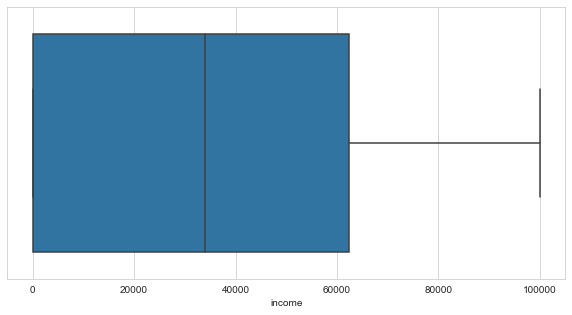

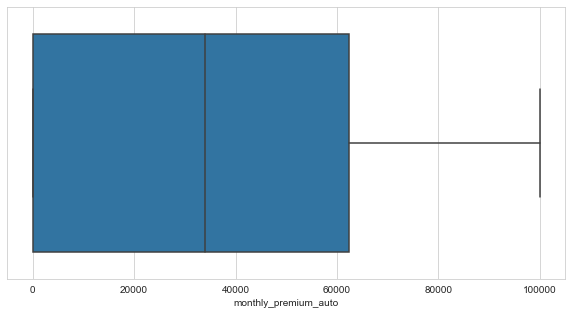

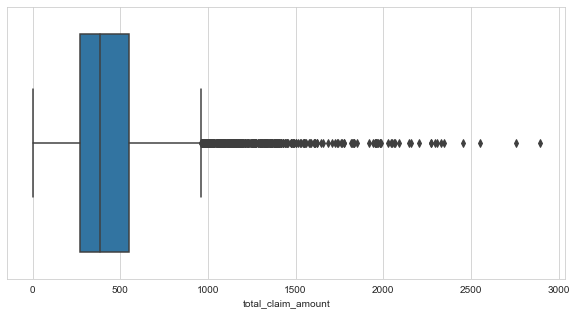

In [49]:
for col in continuous_df:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=continuous_df[col])
    plt.show()

In [50]:
# Total_claim_amount and customer_lifetime_value have the most outliers

In [51]:
def remove_outliers(df, threshold=1.5):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        if len(df[column].unique()) < 10:
            continue
        else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [52]:
continuous = remove_outliers(continuous_df, threshold=1.5)

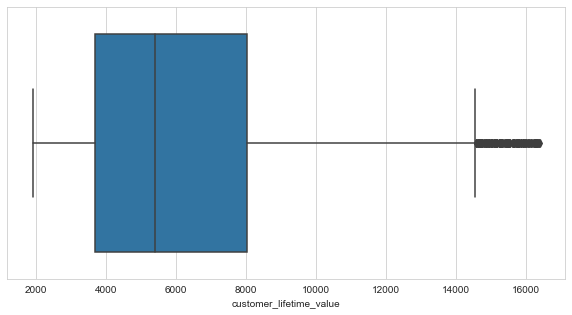

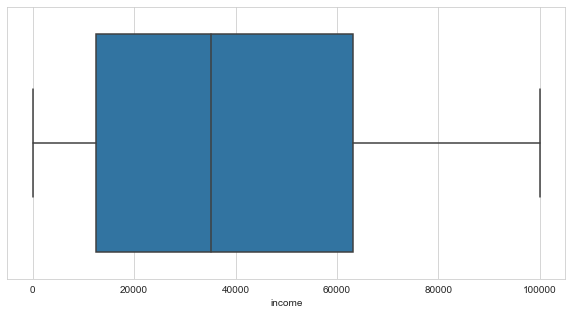

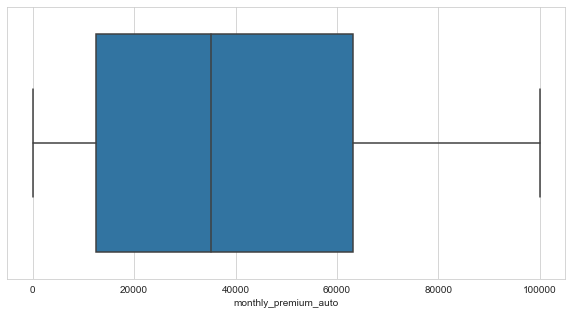

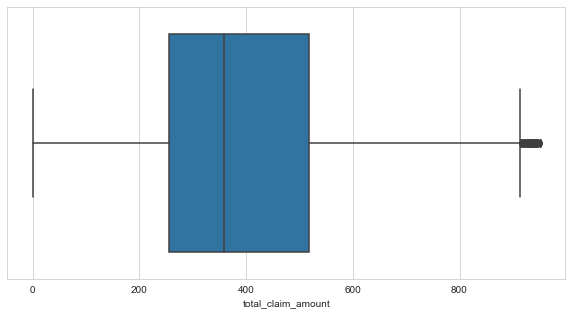

In [53]:
for col in continuous:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=continuous[col])
    plt.show()

In [54]:
# Checking NaN values per column
def check_nan(df):
    nulls = pd.DataFrame(df.isna().sum()/len(df))
    nulls= nulls.reset_index()
    nulls.columns = ['column_name', 'Percentage Null Values']
    nulls.sort_values(by='Percentage Null Values', ascending = False)
    return nulls

In [55]:
cont = check_nan(continuous)
cont

,column_name,Percentage Null Values
0,customer_lifetime_value,0.0
1,income,0.0
2,monthly_premium_auto,0.0
3,total_claim_amount,0.0


In [56]:
disc = check_nan(discrete_df)

In [57]:
disc

,column_name,Percentage Null Values
0,months_since_last_claim,0.0
1,months_since_policy_inception,0.0
2,number_of_open_complaints,0.0
3,number_of_policies,0.0


In [58]:
# 9. Define a function that differentiate between continuous and discrete variables. 
# Hint: Number of unique values might be useful. 
# Store continuous data into a continuous variable and do the same for discrete and categorical.
# Was already done
#def to_dict(df):
#    for col in df.columns:
#        if df[col].dtypes == 'int64':
#            df1 = df.select_dtypes(include='int64')
#            discrete = df1.to_dict()
#        else:
#            df2 = df.select_dtypes(include='float64')
#            continuous = df2.to_dict()
#    return continuous, discrete

In [59]:
# 10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. 
# Hint: Use the same method you used in step 7. 
# Depending on the implementation, decide what to do with the variables you get.

# 10 to 12 is already done

cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [60]:
for col in cat:
    x = cat[col].unique()
    print(x)

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [61]:
# Lab | Feature extraction

In [62]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [63]:
# 2. Plot all the categorical variables with the proper plot. What can you see?

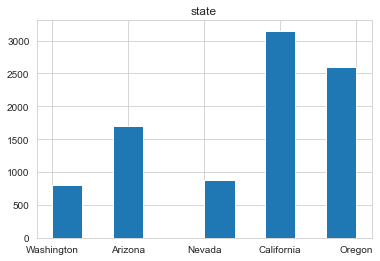

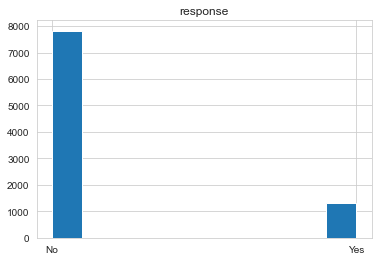

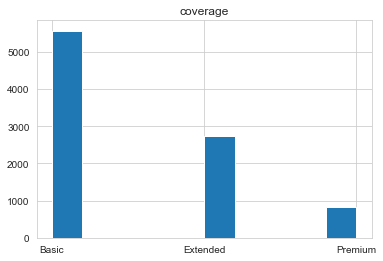

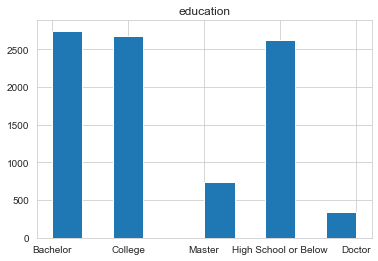

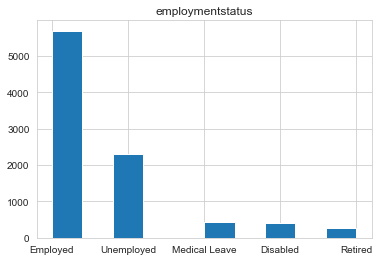

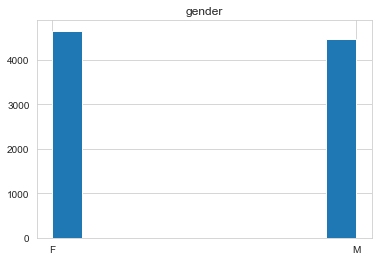

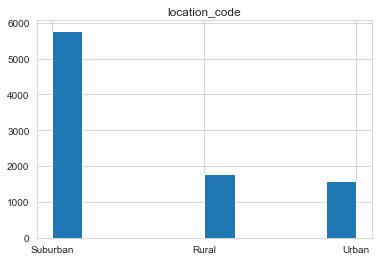

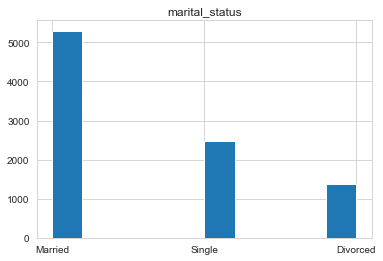

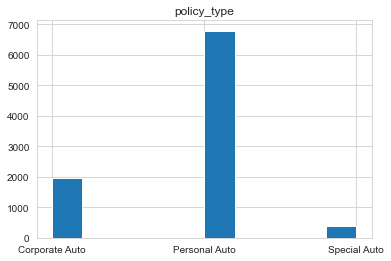

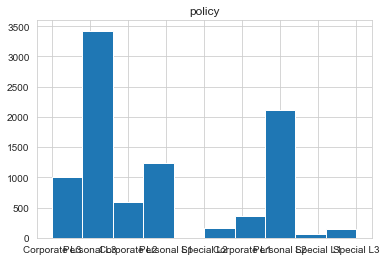

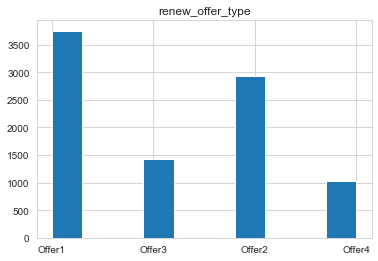

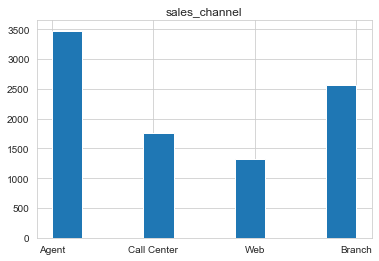

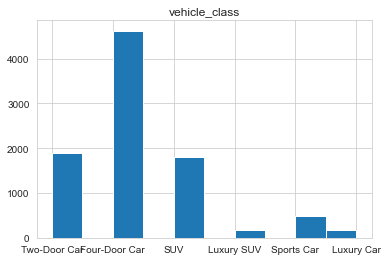

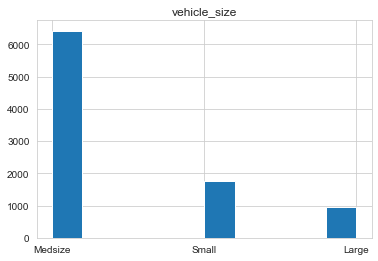

In [64]:
# to see the distribution
for col in cat:
    cat[col].hist()
    plt.title(col)
    plt.show()

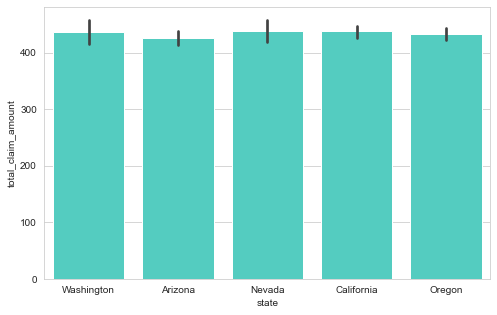

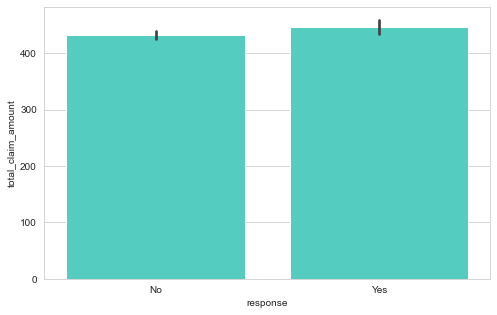

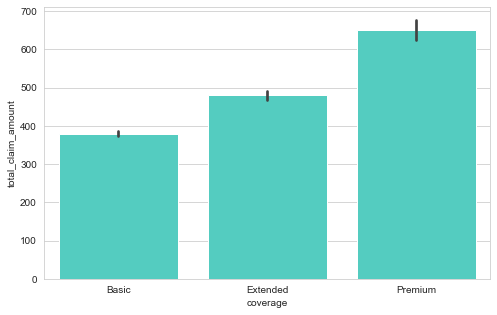

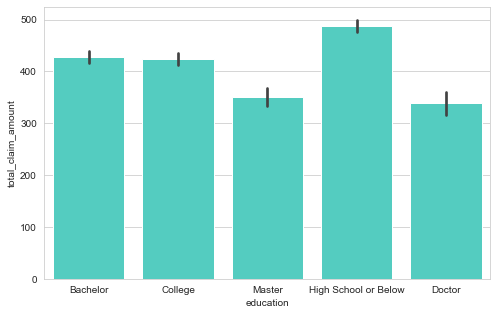

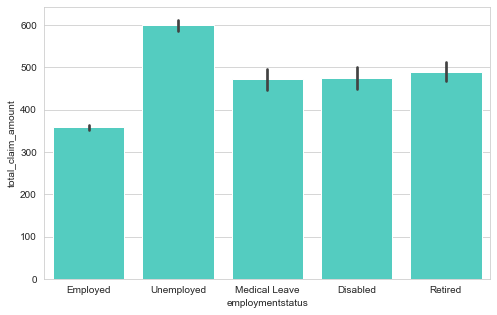

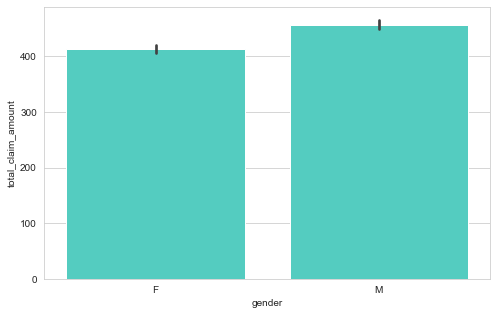

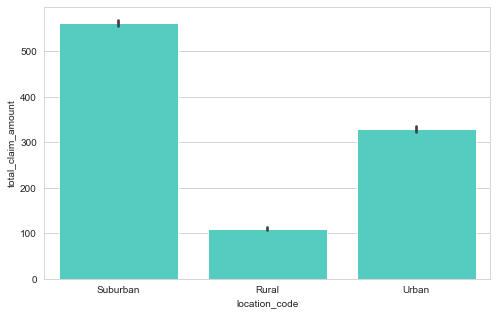

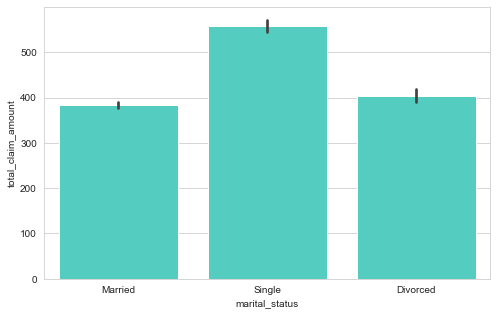

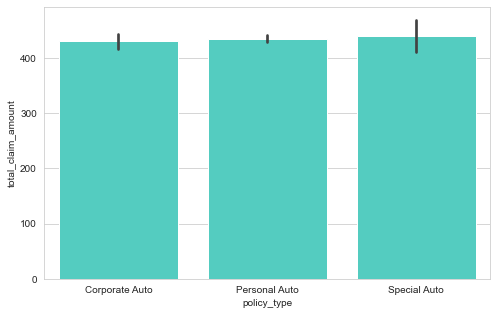

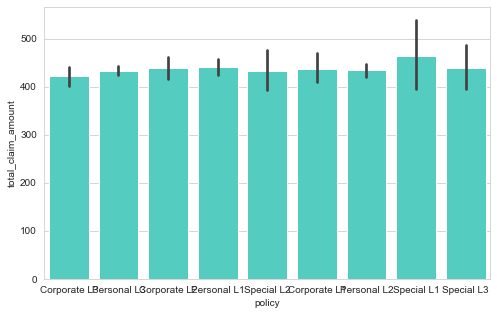

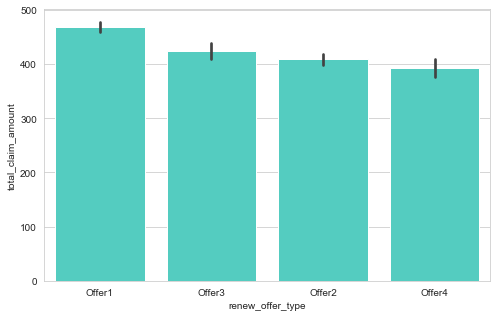

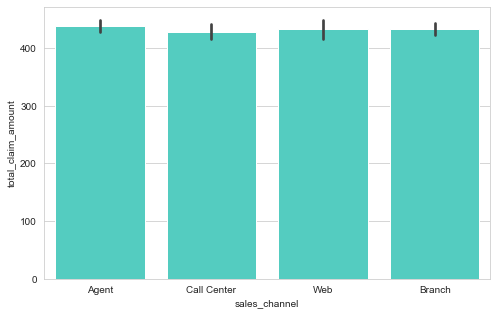

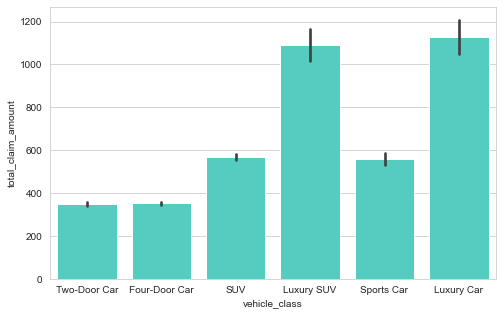

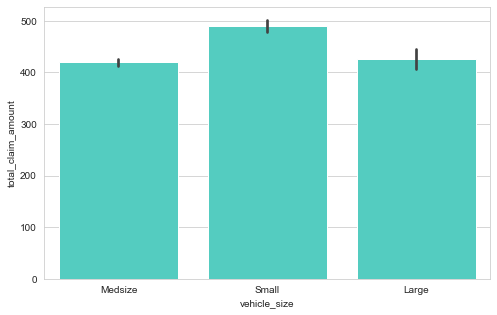

In [65]:
for col in cat:
    plt.figure(figsize=(8,5))
    sns.barplot(x=cat[col],y=customer_df['total_claim_amount'], color='turquoise')

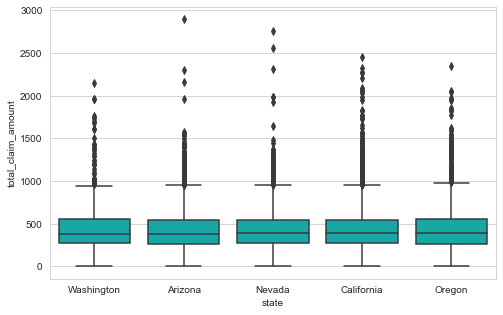

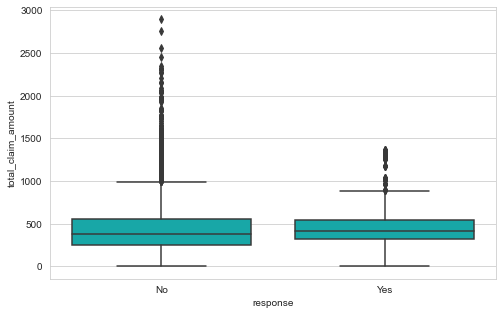

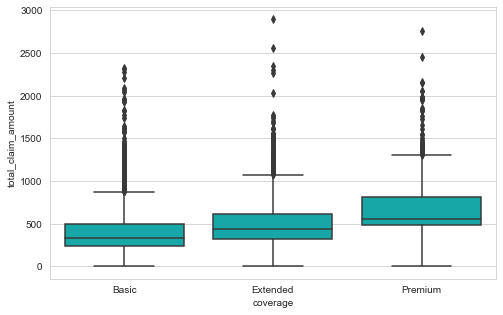

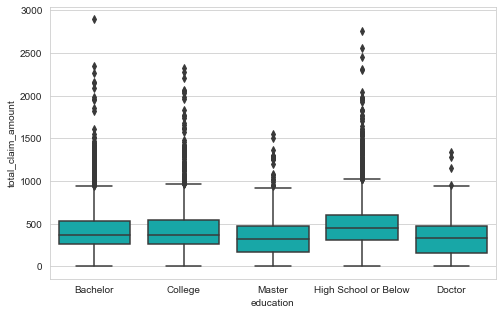

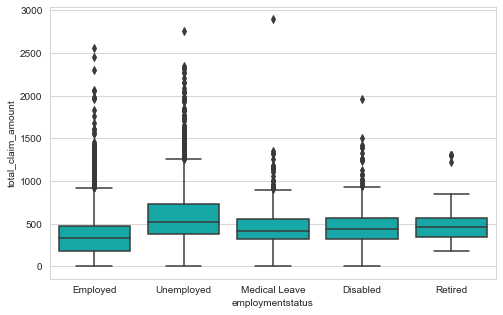

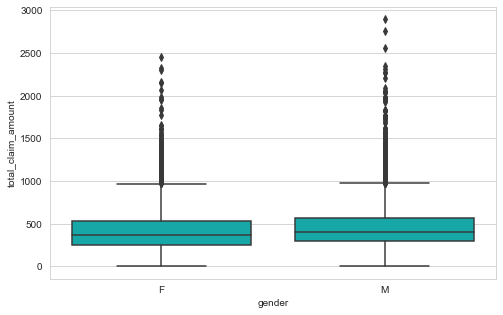

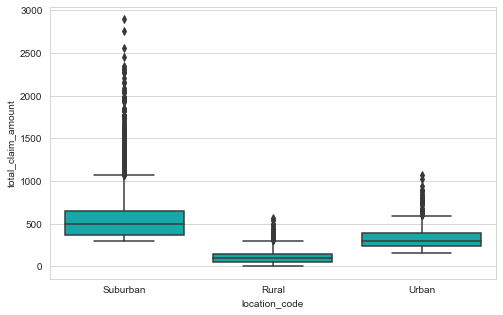

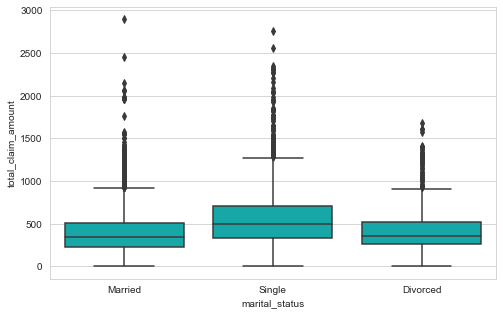

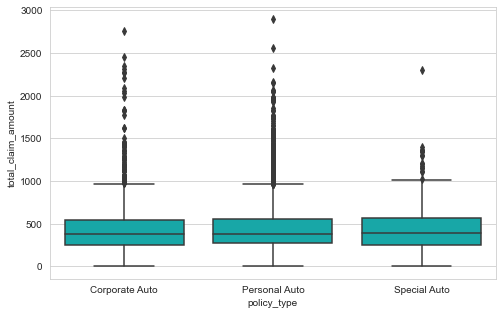

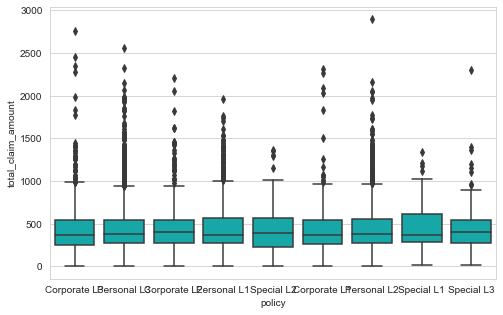

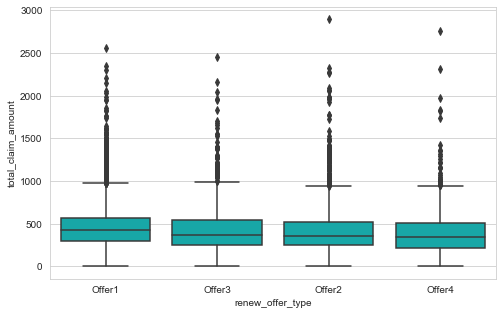

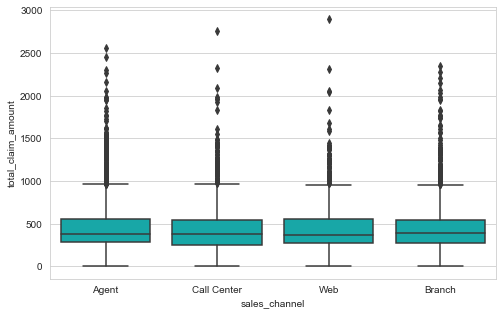

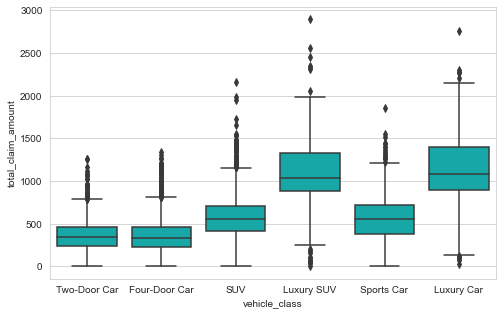

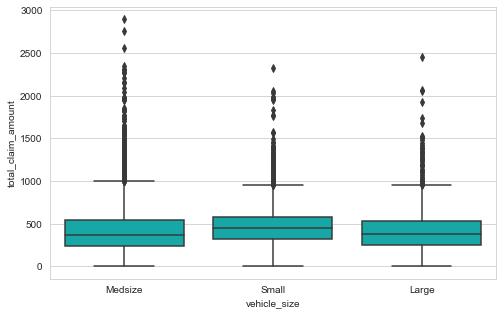

In [66]:
for col in cat:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=cat[col], y=customer_df['total_claim_amount'], color='c')
    plt.show()

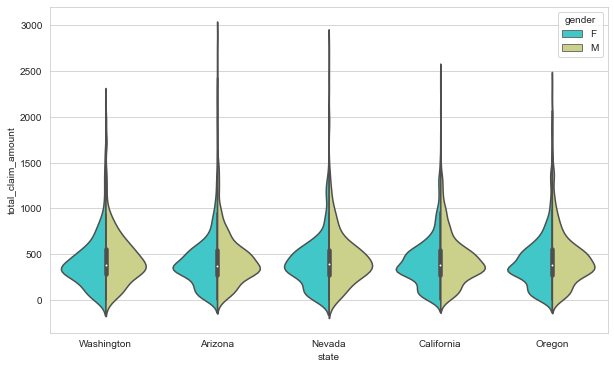

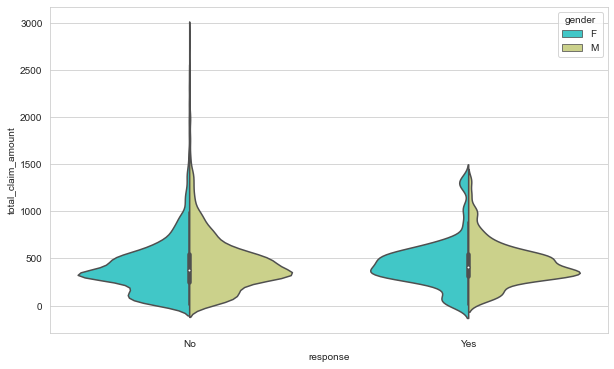

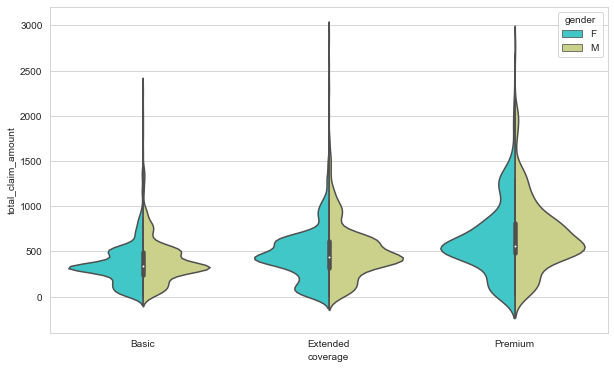

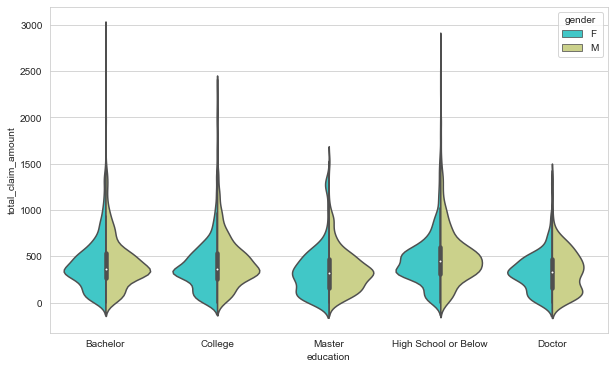

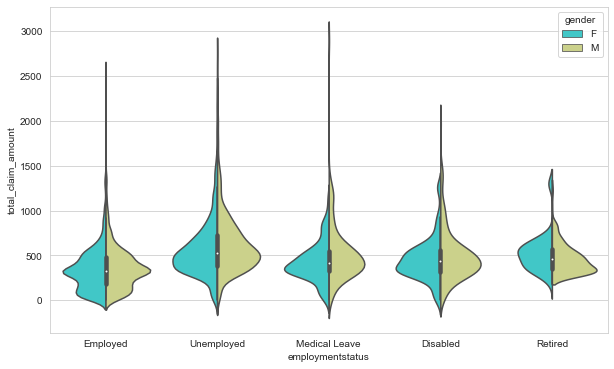

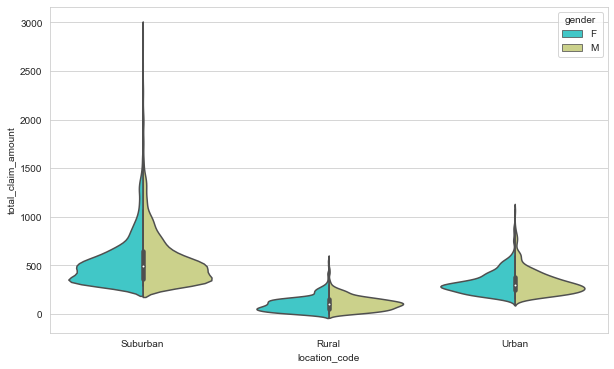

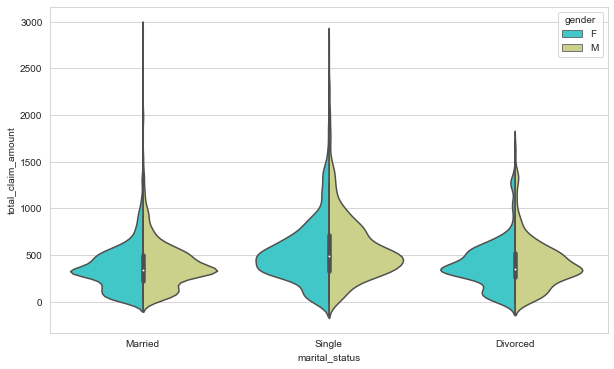

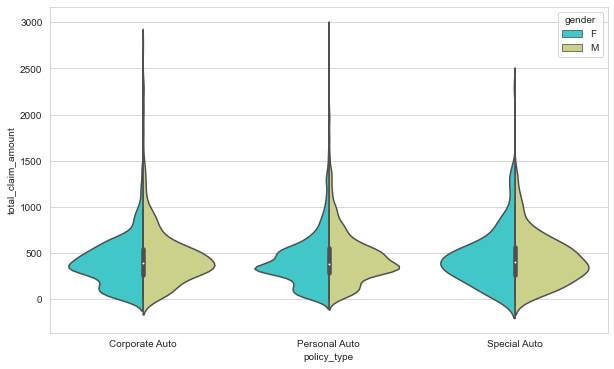

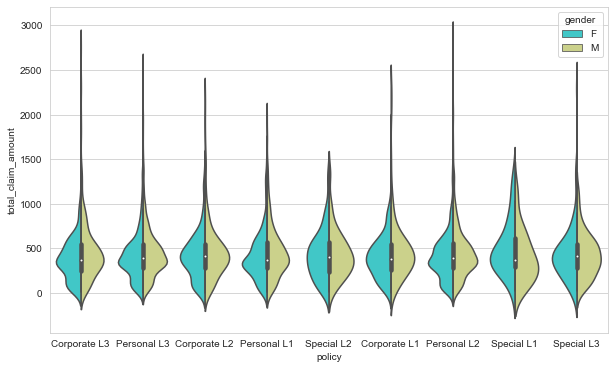

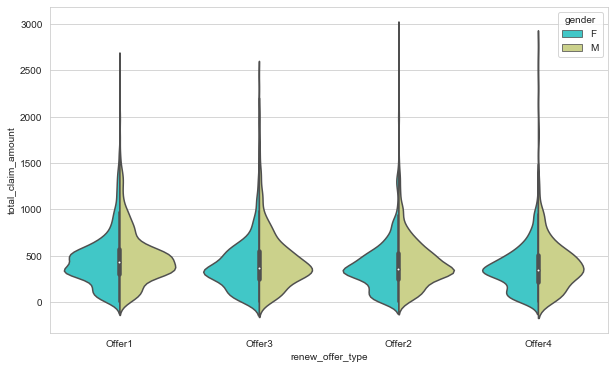

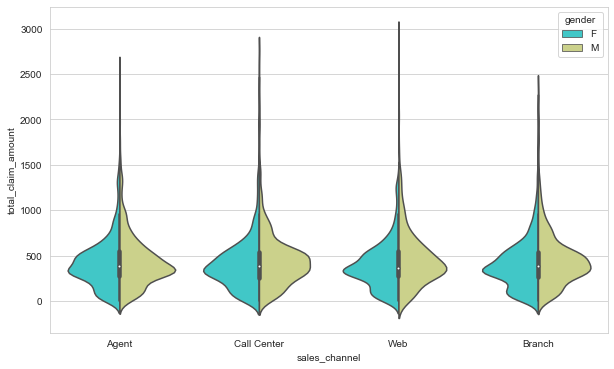

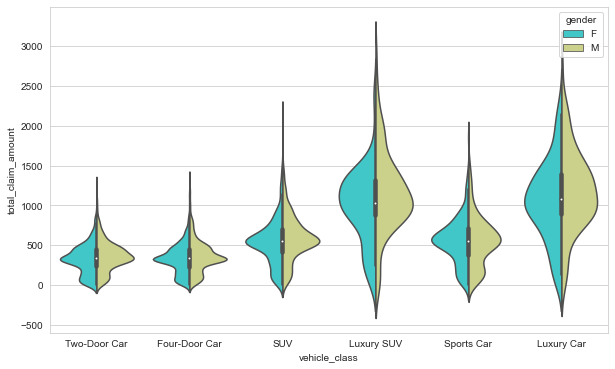

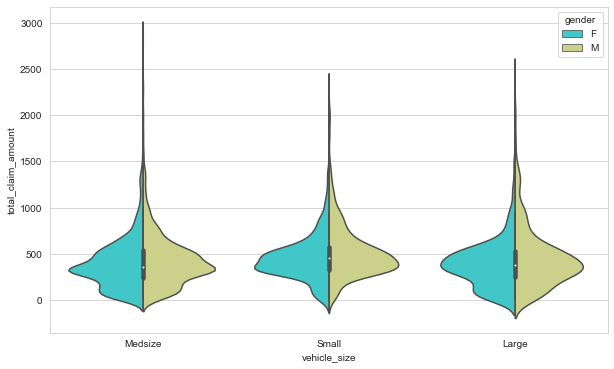

In [67]:
cats_to_include = cat.loc[:, cat.columns != 'gender']
for col in cats_to_include:
    plt.figure(figsize=(10,6))
    sns.violinplot(x=cat[col],y=customer_df['total_claim_amount'], hue=cat['gender'], split='True', palette='rainbow')
    plt.show

##### Observations:

The gender columns appears to be redundant as there seems to be no difference in distributionn for almost all the other colums (the violin plots are symmetrical enough)

Policy type and policy are also repetitive, policy type doesn't tell us anything that isn't already in policy.
I would keep policy and drop policy type.

The same observation applies to vehicle_class and vehicle_size, I would keep the vehicle class.

In [68]:
cat = cat.drop(['gender','policy_type','vehicle_size'], axis=1)
cat.head()

,state,response,coverage,education,employmentstatus,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
customer,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car
AI49188,Nevada,No,Premium,Bachelor,Employed,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car
WW63253,California,No,Basic,Bachelor,Unemployed,Suburban,Married,Corporate L2,Offer1,Call Center,SUV
HB64268,Washington,No,Basic,Bachelor,Employed,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car


In [69]:
# Plot time variable

In [70]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

In [71]:
customer_df.effective_to_date.unique()

array(['2011-02-24T00:00:00.000000000', '2011-01-31T00:00:00.000000000',
       '2011-02-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-01-25T00:00:00.000000000',
       '2011-01-18T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-02-06T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-17T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-02-27T00:00:00.000000000',
       '2011-01-14T00:00:00.000000000', '2011-01-21T00:00:00.000000000',
       '2011-02-05T00:00:00.000000000', '2011-01-29T00:00:00.000000000',
       '2011-02-28T00:00:00.000000000', '2011-02-12T00:00:00.000000000',
       '2011-02-02T00:00:00.000000000', '2011-02-07T00:00:00.000000000',
       '2011-01-22T00:00:00.000000000', '2011-02-13T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-08

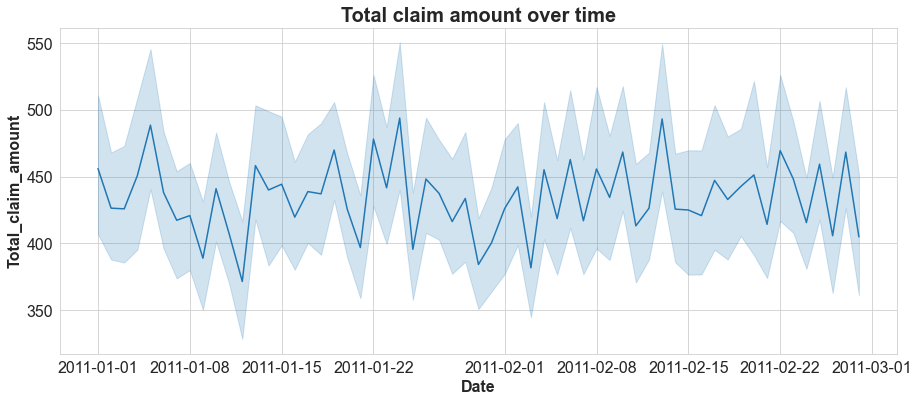

In [72]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(customer_df['effective_to_date'], customer_df['total_claim_amount'] )

ax.set_title('Total claim amount over time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total_claim_amount', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

In [73]:
time_plot = customer_df.copy()

In [74]:
time_plot['month']= time_plot['effective_to_date'].dt.month
time_plot['day']= time_plot['effective_to_date'].dt.day
time_plot.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day
customer,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


Text(0, 0.5, 'Total Claim Amount')

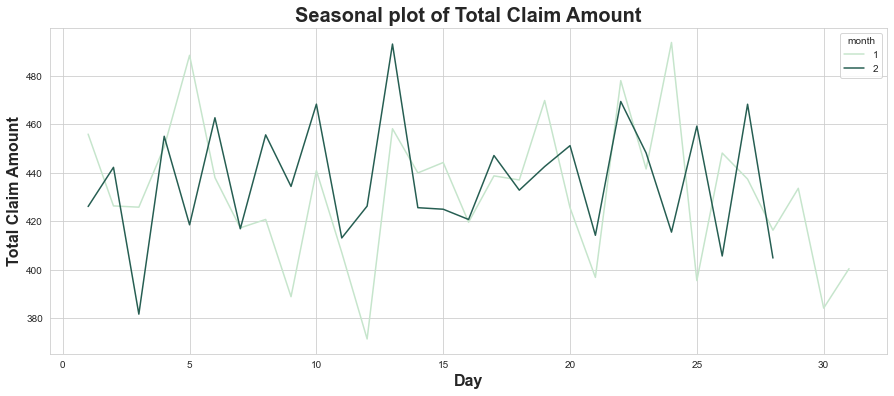

In [75]:
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 2)
sns.lineplot(time_plot['day'], time_plot['total_claim_amount'], hue=time_plot['month'], palette=palette, ci=None)
ax.set_title('Seasonal plot of Total Claim Amount', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total Claim Amount', fontsize = 16, fontdict=dict(weight='bold'))

In [76]:
# there seems to be an overall monthly trend

## Lab | Data cleaning and wrangling

##### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. 
Use the one you feel more comfortable with, define a function for that. 
Use the function to remove the outliers and apply it to the dataframe.

In [77]:
def remove_outliers(df, threshold=1.5):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        if len(df[column].unique()) < 10:
            continue
        else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df
# already used it on the continuous dataframe

##### 2. Create a copy of the dataframe

In [78]:
data_copy = customer_df.copy()

##### 3. Normalize the continuous variables. You can use any one method you want.
I will use the StandardScaler

In [79]:
transformer = StandardScaler().fit(continuous)
x_standardized = transformer.transform(continuous)
X = pd.DataFrame(x_standardized)
X.columns = continuous.columns
X.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,-1.069665,0.580066,0.580066,-0.006058
1,2.109020,0.332533,0.332533,0.867553
2,0.463283,-1.275491,-1.275491,0.691587
3,-1.053912,0.169940,0.169940,-1.192347
4,0.654946,0.798615,0.798615,-1.090145


###### Merging the numerical dataframes:

In [80]:
len(discrete_df)-len(X)

1172

In [81]:
# Left join
X.reset_index(drop=True, inplace=True)
discrete_df.reset_index(drop=True, inplace=True)
numerical_df = pd.merge(X, discrete_df, how='left', left_index=True, right_index=True)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-1.069665,0.580066,0.580066,-0.006058,32,5,0,1
1,2.109020,0.332533,0.332533,0.867553,13,42,0,8
2,0.463283,-1.275491,-1.275491,0.691587,18,38,0,2
3,-1.053912,0.169940,0.169940,-1.192347,18,65,0,7
4,0.654946,0.798615,0.798615,-1.090145,12,44,0,1
...,...,...,...,...,...,...,...,...
7957,-0.649914,0.299361,0.299361,0.746413,19,39,0,2
7958,-0.965113,-0.563129,-0.563129,-0.033042,17,69,0,1
7959,0.625932,-1.275491,-1.275491,1.946277,0,20,0,1
7960,0.425160,-0.552017,-0.552017,1.467371,31,68,0,2


###### 4. Encode the categorical variables

In [82]:
cat_encoded = pd.get_dummies(cat, columns=cat.columns, drop_first=True)
cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
cat_encoded.shape

(9134, 38)

###### 5. The time variable can be useful. Try to transform its data into a useful one.
Hint: Day week and month as integers might be useful. \
=> Has already been done in order to plot the datetime data. \
I will apply the same method on data_copy and drop the effective_to_date column

In [84]:
time_plot.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day
customer,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


In [85]:
data_copy['month']= data_copy['effective_to_date'].dt.month
data_copy['day']= data_copy['effective_to_date'].dt.day
data_copy = data_copy.drop(['effective_to_date'], axis=1)

In [86]:
data_copy.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day
customer,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


###### 6. Since the model will only accept numerical data:
Check and make sure that every column is numerical, if some are not, change it using encoding: \
\
One hot to state \
Ordinal to coverage \
Ordinal to employmentstatus \
Ordinal to location code \
One hot to marital status \
One hot to policy type \
One hot to policy \
One hot to renew offercustomer_df \
One hot to sales channel \
One hot vehicle class \
Ordinal vehicle size \
\
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2}) \
given that column "coverage" in the dataframe "data" has three categories: \
"basic", "extended", and "premium" and values are to be represented in the same order.

###### 4.bis - Will encode the categories differently, based on the Hint

In [87]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data_copy[['state', 'marital_status','policy_type','policy','renew_offer_type', 'sales_channel','vehicle_class']])
encoded = encoder.transform(data_copy[['state', 'marital_status','policy_type','policy','renew_offer_type', 'sales_channel','vehicle_class']]).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [88]:
encoded_cat = pd.DataFrame(encoded)
encoded_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
encoded_cat.columns = encoder.get_feature_names()

In [90]:
encoded_cat

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Married,x1_Single,x2_Personal Auto,x2_Special Auto,x3_Corporate L2,x3_Corporate L3,x3_Personal L1,x3_Personal L2,x3_Personal L3,x3_Special L1,x3_Special L2,x3_Special L3,x4_Offer2,x4_Offer3,x4_Offer4,x5_Branch,x5_Call Center,x5_Web,x6_Luxury Car,x6_Luxury SUV,x6_SUV,x6_Sports Car,x6_Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### ORDINAL ENCODING
Ordinal to coverage \
Ordinal to employmentstatus \
Ordinal to location code \
Ordinal vehicle size 

In [91]:
ordinal = data_copy[['coverage','employmentstatus','location_code','vehicle_size']]
ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,Basic,Employed,Suburban,Medsize
QZ44356,Extended,Unemployed,Suburban,Medsize
AI49188,Premium,Employed,Suburban,Medsize
WW63253,Basic,Unemployed,Suburban,Medsize
HB64268,Basic,Employed,Rural,Medsize
...,...,...,...,...
LA72316,Basic,Employed,Urban,Medsize
PK87824,Extended,Employed,Suburban,Medsize
TD14365,Extended,Unemployed,Suburban,Medsize


###### 1. encode the coverage - first we look at the unique values and the count

In [92]:
ordinal.coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [93]:
# Intuitively we want to rank like this:
# Define a dictionary for encoding variable
cov_dict = {'Basic':0,
            'Extended':1,
            'Premium':2}

# Create the mapped values in a new column
ordinal['coverage'] = ordinal['coverage'].map(cov_dict)

# Check
ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,0,Employed,Suburban,Medsize
QZ44356,1,Unemployed,Suburban,Medsize
AI49188,2,Employed,Suburban,Medsize
WW63253,0,Unemployed,Suburban,Medsize
HB64268,0,Employed,Rural,Medsize
...,...,...,...,...
LA72316,0,Employed,Urban,Medsize
PK87824,1,Employed,Suburban,Medsize
TD14365,1,Unemployed,Suburban,Medsize


###### 2. Encode the employmentstatus

In [94]:
ordinal.employmentstatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [95]:
# first we'll put Medical leave, Disabled and Retired in a new category called 'other'.
# we could also put these in unemployed but I'd say from a monetary perspective they wouldn't get the same revenues,
# for ex, a retired person has (ideally) more revenue and proprietary goods than an unemployed person
count_emp = pd.DataFrame(ordinal['employmentstatus'].value_counts())
count_emp = count_emp.reset_index()
count_emp.columns = ['status', 'counts']
other_df = count_emp[count_emp['counts']<500]
other_df = list(other_df['status'])
other_df

['Medical Leave', 'Disabled', 'Retired']

In [96]:
def clean_employement_status(x):
    if x in other_df:
        return 'Other'
    else:
        return x

ordinal['employmentstatus'] = list(map(clean_employement_status, ordinal['employmentstatus']))
ordinal.employmentstatus.value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

<AxesSubplot:xlabel='employmentstatus', ylabel='total_claim_amount'>

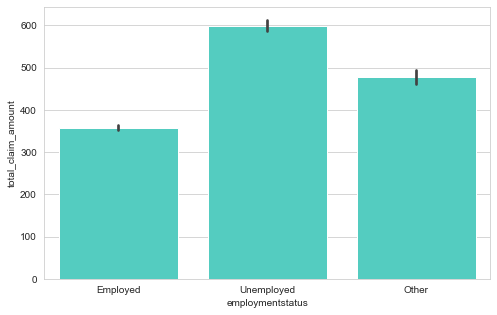

In [97]:
# Now how would we order it, to better serve our analysis and in a way that is relevant to our target?
plt.figure(figsize=(8,5))
sns.barplot(x=ordinal['employmentstatus'],y=customer_df['total_claim_amount'], color='turquoise')

In [98]:
# The 'least' employed have the most claim amount - I will order it from 0 (least employment) to 2 (most employment)
# Define a dictionary for encoding variable
emp_dict = {'Unemployed':0,
            'Other':1,
            'Employed':2}

# Create the mapped values in a new column
ordinal['employmentstatus'] = ordinal['employmentstatus'].map(emp_dict)

# Check
ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,0,2,Suburban,Medsize
QZ44356,1,0,Suburban,Medsize
AI49188,2,2,Suburban,Medsize
WW63253,0,0,Suburban,Medsize
HB64268,0,2,Rural,Medsize
...,...,...,...,...
LA72316,0,2,Urban,Medsize
PK87824,1,2,Suburban,Medsize
TD14365,1,0,Suburban,Medsize


###### 3. Encode the location_code

In [99]:
ordinal.location_code.value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

<AxesSubplot:xlabel='location_code', ylabel='total_claim_amount'>

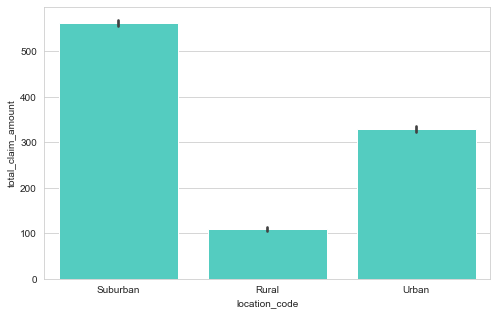

In [100]:
# Checking the plot again
plt.figure(figsize=(8,5))
sns.barplot(x=ordinal['location_code'],y=customer_df['total_claim_amount'], color='turquoise')

In [101]:
# it looks coherent with the value_counts => the higher the concentration of cars, the higher the total_claim_amount
# Define a dictionary for encoding variable
loc_dict = {'Rural':0,
            'Urban':1,
            'Suburban':2}

# Create the mapped values in a new column
ordinal['location_code'] = ordinal['location_code'].map(loc_dict)

# Check
ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,0,2,2,Medsize
QZ44356,1,0,2,Medsize
AI49188,2,2,2,Medsize
WW63253,0,0,2,Medsize
HB64268,0,2,0,Medsize
...,...,...,...,...
LA72316,0,2,1,Medsize
PK87824,1,2,2,Medsize
TD14365,1,0,2,Medsize


###### 4. Encode the vehicle_size

In [102]:
ordinal.vehicle_size.value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

<AxesSubplot:xlabel='vehicle_size', ylabel='total_claim_amount'>

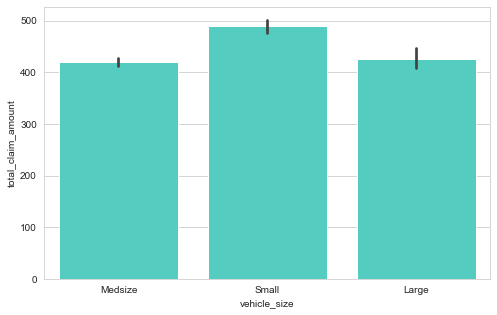

In [103]:
# Checking the plot again
plt.figure(figsize=(8,5))
sns.barplot(x=ordinal['vehicle_size'],y=customer_df['total_claim_amount'], color='turquoise')

In [104]:
# not a lot of difference here, will rank this variable based on size, pretty straightforward
# Define a dictionary for encoding variable
car_dict = {'Small':0,
            'Medsize':1,
            'Large':2}

# Create the mapped values in a new column
ordinal['vehicle_size'] = ordinal['vehicle_size'].map(car_dict)

# Check
ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,0,2,2,1
QZ44356,1,0,2,1
AI49188,2,2,2,1
WW63253,0,0,2,1
HB64268,0,2,0,1
...,...,...,...,...
LA72316,0,2,1,1
PK87824,1,2,2,1
TD14365,1,0,2,1


###### Getting all of our encoded categorical data together

In [105]:
ordinal.reset_index(drop=True, inplace=True)
encoded_cat.reset_index(drop=True, inplace=True)
final_cat = pd.concat([ordinal, encoded_cat], axis=1)
final_cat

,coverage,employmentstatus,location_code,vehicle_size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Married,x1_Single,x2_Personal Auto,x2_Special Auto,x3_Corporate L2,x3_Corporate L3,x3_Personal L1,x3_Personal L2,x3_Personal L3,x3_Special L1,x3_Special L2,x3_Special L3,x4_Offer2,x4_Offer3,x4_Offer4,x5_Branch,x5_Call Center,x5_Web,x6_Luxury Car,x6_Luxury SUV,x6_SUV,x6_Sports Car,x6_Two-Door Car
0,0,2,2,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,2,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,2,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,2,0,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1,2,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1,0,2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1,2,2,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Getting all of our data together and checking for NaNs

In [106]:
numerical_df.shape

(7962, 8)

In [107]:
data = pd.merge(numerical_df, final_cat, how='left', left_index=True, right_index=True)
data

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,location_code,vehicle_size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Married,x1_Single,x2_Personal Auto,x2_Special Auto,x3_Corporate L2,x3_Corporate L3,x3_Personal L1,x3_Personal L2,x3_Personal L3,x3_Special L1,x3_Special L2,x3_Special L3,x4_Offer2,x4_Offer3,x4_Offer4,x5_Branch,x5_Call Center,x5_Web,x6_Luxury Car,x6_Luxury SUV,x6_SUV,x6_Sports Car,x6_Two-Door Car
0,-1.069665,0.580066,0.580066,-0.006058,32,5,0,1,0,2,2,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.109020,0.332533,0.332533,0.867553,13,42,0,8,1,0,2,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.463283,-1.275491,-1.275491,0.691587,18,38,0,2,2,2,2,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.053912,0.169940,0.169940,-1.192347,18,65,0,7,0,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.654946,0.798615,0.798615,-1.090145,12,44,0,1,0,2,0,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957,-0.649914,0.299361,0.299361,0.746413,19,39,0,2,2,0,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7958,-0.965113,-0.563129,-0.563129,-0.033042,17,69,0,1,2,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7959,0.625932,-1.275491,-1.275491,1.946277,0,20,0,1,1,2,2,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7960,0.425160,-0.552017,-0.552017,1.467371,31,68,0,2,0,2,2,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
data.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
total_claim_amount               0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
coverage                         0
employmentstatus                 0
location_code                    0
vehicle_size                     0
x0_California                    0
x0_Nevada                        0
x0_Oregon                        0
x0_Washington                    0
x1_Married                       0
x1_Single                        0
x2_Personal Auto                 0
x2_Special Auto                  0
x3_Corporate L2                  0
x3_Corporate L3                  0
x3_Personal L1                   0
x3_Personal L2                   0
x3_Personal L3                   0
x3_Special L1                    0
x3_Special L2                    0
x3_Special L3                    0
x4_Offer2           

# Lab | Comparing regression models

###### In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [109]:
y = continuous['total_claim_amount']
X = data.drop('total_claim_amount', axis = 1)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Linear Regression

In [111]:
def modeling(y, X, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train )
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    print("R2 =", round(r2,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [112]:
predictions, y_test, r2 = modeling(y, X, test_size=0.3)

R2 = 0.18
RMSE = 186.71
MSE = 34859.52
MAE = 147.69


#### Visualizing the differences between real and predicted values

In [113]:
# Create dataframe for visualising the differences between real and predicted values
def diff_df(y_test, predictions):
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    results = results.sort_values('diff', ascending=False).head(10)
    return results

In [114]:
results = diff_df(y_test, predictions)
results

,true,pred,diff
6155,929.958895,270.829482,659.129413
8557,840.231575,235.938335,604.293240
2496,926.400000,325.658500,600.741500
4774,802.278237,237.729131,564.549106
2547,892.800000,332.114441,560.685559
8285,904.813121,344.326826,560.486295
2453,921.600000,361.855659,559.744341
8490,926.400000,372.534042,553.865958
6727,871.200000,318.452284,552.747716
186,754.358929,206.662286,547.696643


#### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [115]:
def modeling(y, X, models=[], test_size=0.3):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

#### Use the function to check LinearRegressor and KNeighborsRegressor.

In [116]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=10)])

LinearRegression() metrics are: 
R2 = 0.18
RMSE = 186.71
MSE = 34859.52
MAE = 147.69
KNeighborsRegressor(n_neighbors=10) metrics are: 
R2 = 0.05
RMSE = 201.11
MSE = 40447.06
MAE = 159.79


####  4. You can check also the MLPRegressor for this task!

In [117]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [118]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=10), MLPRegressor(max_iter=100)])

LinearRegression() metrics are: 
R2 = 0.18
RMSE = 186.71
MSE = 34859.52
MAE = 147.69
KNeighborsRegressor(n_neighbors=10) metrics are: 
R2 = 0.05
RMSE = 201.11
MSE = 40447.06
MAE = 159.79
MLPRegressor(max_iter=100) metrics are: 
R2 = 0.14
RMSE = 191.28
MSE = 36587.15
MAE = 150.47


#### 5. Check and discuss the results.
Let's check how the predictions compare to the results. \
We could improve the function to run different k values and return the best predictions. \
Same with the MLP regressor and the max_iter values.

### Finding the best K value

In [119]:
scores = []
for i in range(2,30,2): 
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

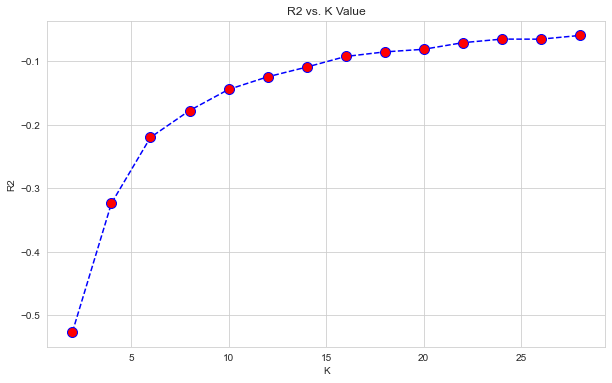

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(2,30,2), scores, color = 'blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

###### From 14~16 the K-value curve flattens, so we can keep 14.
But overall the predictions with the KNeighborsRegressor are very bad.

In [121]:
def diff_df(y_test, predictions):
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    results = results.sort_values('diff', ascending=False).head(10)
    return results

In [122]:
k_predictions, y_test, k_r2 = modeling(y, X, models=[KNeighborsRegressor(n_neighbors=14)])

KNeighborsRegressor(n_neighbors=14) metrics are: 
R2 = 0.07
RMSE = 199.61
MSE = 39843.71
MAE = 158.81


In [123]:
LR_predictions, y_test, LR_r2 = modeling(y, X, models=[LinearRegression()])

LinearRegression() metrics are: 
R2 = 0.18
RMSE = 186.71
MSE = 34859.52
MAE = 147.69


In [124]:
MLP_predictions, y_test, MLP_r2 = modeling(y, X, models=[MLPRegressor(max_iter=100)])

MLPRegressor(max_iter=100) metrics are: 
R2 = 0.15
RMSE = 190.83
MSE = 36415.79
MAE = 150.12


In [125]:
k_results = diff_df(y_test, k_predictions)
k_results

,true,pred,diff
6155,929.958895,301.026654,628.932241
7814,944.854655,325.526769,619.327886
7430,888.000000,269.363523,618.636477
457,938.513425,327.844346,610.669079
8466,949.953253,350.670744,599.282509
104,936.000000,341.428868,594.571132
8557,840.231575,252.872869,587.358706
1649,940.800000,354.141514,586.658486
5788,944.506601,366.128305,578.378296
2547,892.800000,332.750897,560.049103


In [126]:
LR_results = diff_df(y_test, LR_predictions)
LR_results

,true,pred,diff
6155,929.958895,270.829482,659.129413
8557,840.231575,235.938335,604.293240
2496,926.400000,325.658500,600.741500
4774,802.278237,237.729131,564.549106
2547,892.800000,332.114441,560.685559
8285,904.813121,344.326826,560.486295
2453,921.600000,361.855659,559.744341
8490,926.400000,372.534042,553.865958
6727,871.200000,318.452284,552.747716
186,754.358929,206.662286,547.696643


In [127]:
MLP_results = diff_df(y_test, MLP_predictions)
MLP_results

,true,pred,diff
6155,929.958895,262.883072,667.075823
8557,840.231575,182.365505,657.866070
6727,871.200000,219.816684,651.383316
2453,921.600000,271.870327,649.729673
4774,802.278237,175.438277,626.839960
1649,940.800000,332.039321,608.760679
4046,707.408058,106.252250,601.155808
8285,904.813121,306.124783,598.688338
186,754.358929,177.042781,577.316148
2496,926.400000,353.807823,572.592177


In [128]:
def we_like_to_see(results):
    beautiful_graph = sns.regplot(results['true'], results['pred'])
    return beautiful_graph

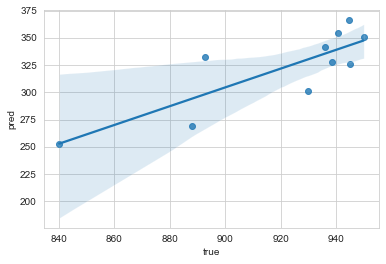

In [129]:
k_beautiful_graph = we_like_to_see(k_results)

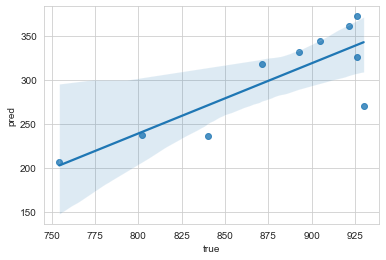

In [130]:
LR_beautiful_graph = we_like_to_see(LR_results)

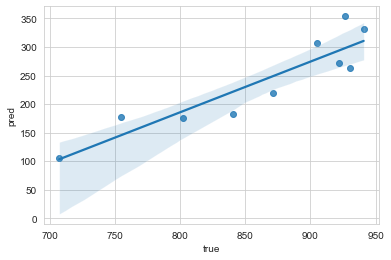

In [131]:
MLP_beautiful_graph = we_like_to_see(MLP_results)

### The models are not very good at predicting the target, we need to revisit the data

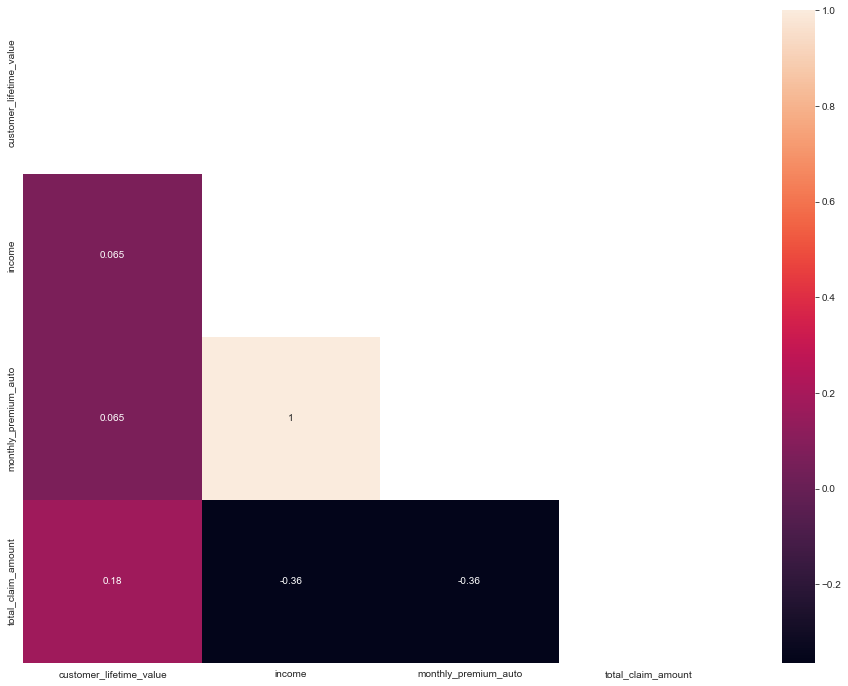

In [132]:
mask = np.zeros_like(continuous.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(continuous.corr(), mask=mask, annot=True)
plt.show()

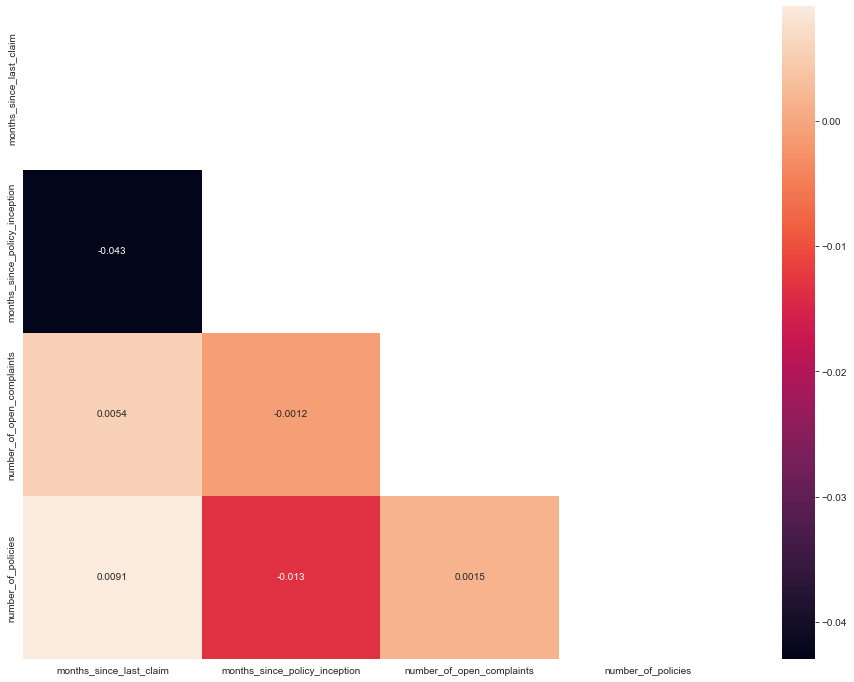

In [133]:
mask = np.zeros_like(discrete_df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(discrete_df.corr(), mask=mask, annot=True)
plt.show()

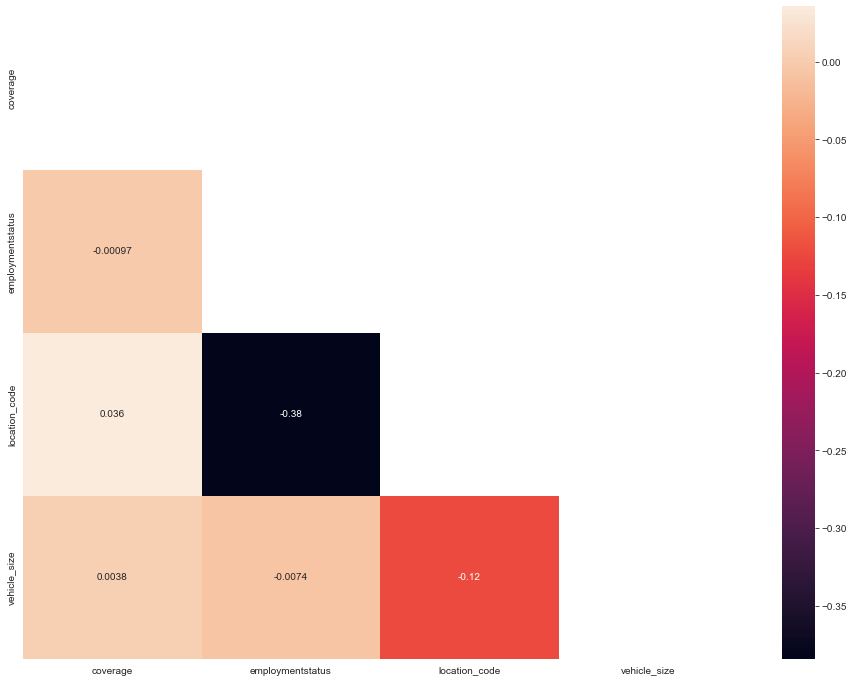

In [134]:
mask = np.zeros_like(ordinal.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(ordinal.corr(), mask=mask, annot=True)
plt.show()

# Lab | Random variable distributions

### 1. Get the numerical variables from our dataset.

In [135]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,56274.0,32,5,0,1,384.811147
1,6979.535903,0.0,0.0,13,42,0,8,1131.464935
2,12887.431650,48767.0,48767.0,18,38,0,2,566.472247
3,7645.861827,0.0,0.0,18,65,0,7,529.881344
4,2813.692575,43836.0,43836.0,12,44,0,1,138.130879


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

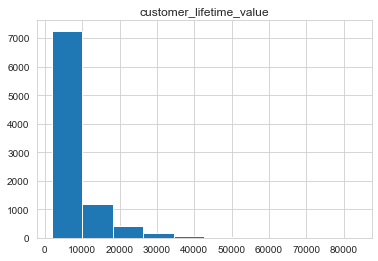

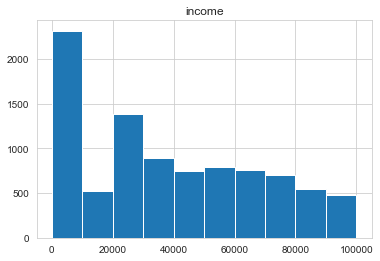

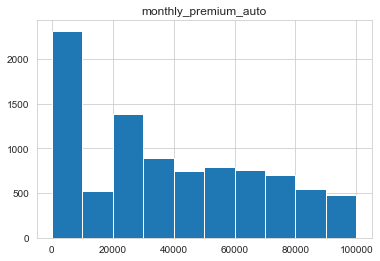

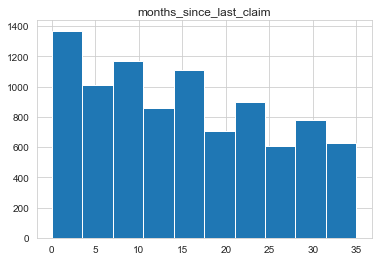

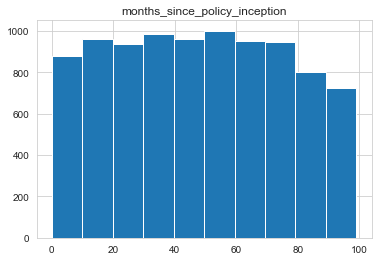

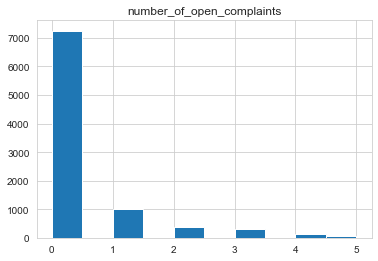

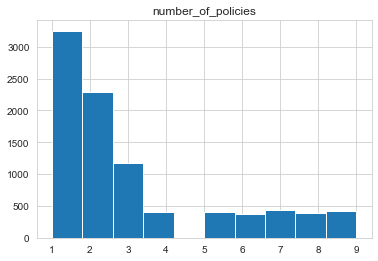

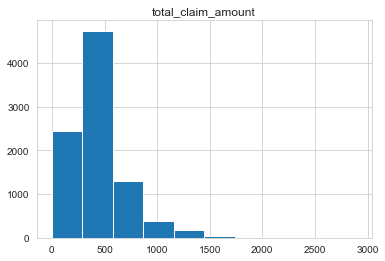

In [136]:
for column in numericals:
    numericals[column].hist()
    plt.title(column)
    plt.show()

###### Most of the plots seem to follow a negative exponential distribution or a uniform distribution

In [142]:
for col in numericals:
    ks_statistic, p_value = kstest(numericals[col], 'norm')
    print(ks_statistic, p_value)

1.0 0.0
0.746332384497482 0.0
0.746332384497482 0.0
0.9051018496590028 0.0
0.9705134696057687 0.0
0.5 0.0
0.8413447460685429 0.0
0.9969335267664072 0.0


###### Conclusion
If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. \
If the P-Value of the KS Test is smaller than 0.05, we do not assume a normal distribution

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [143]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

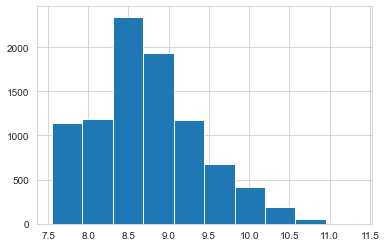

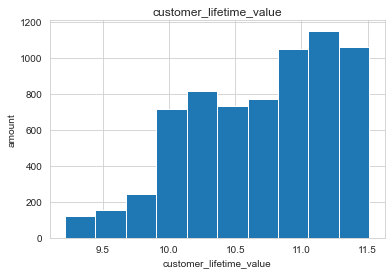

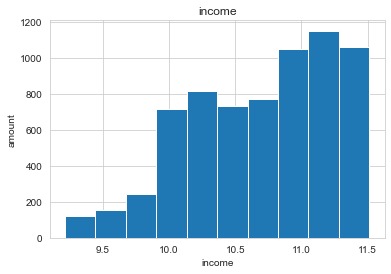

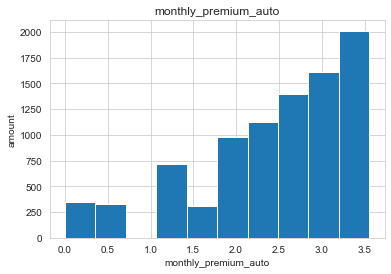

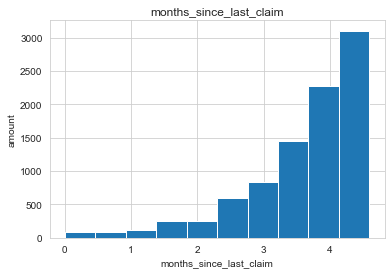

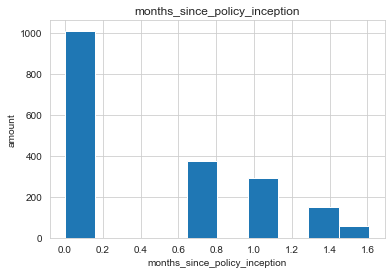

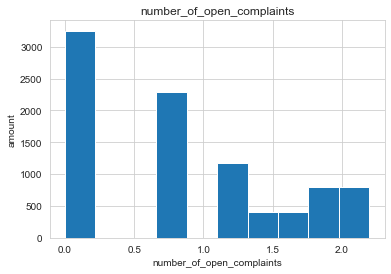

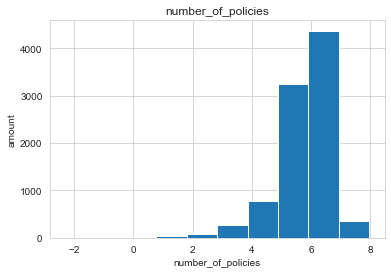

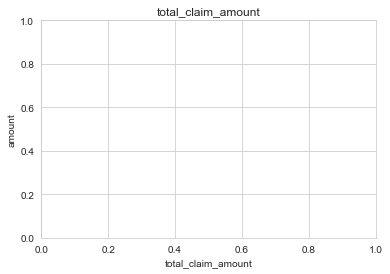

In [161]:
for col in numericals:
    pd.Series(map(log_transfom_clean_, numericals[col])).hist()
    plt.show()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('amount')

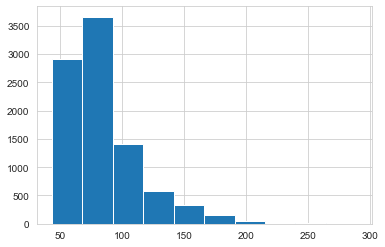

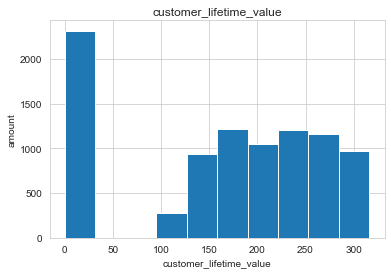

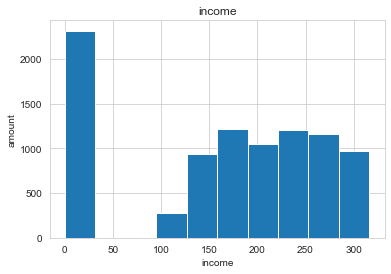

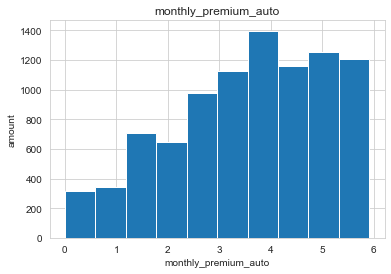

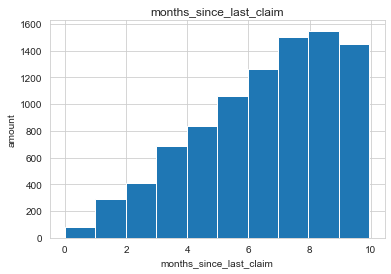

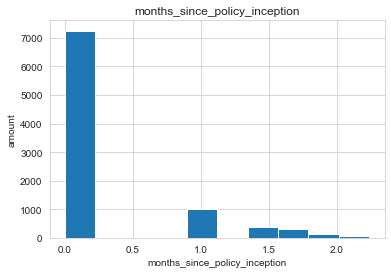

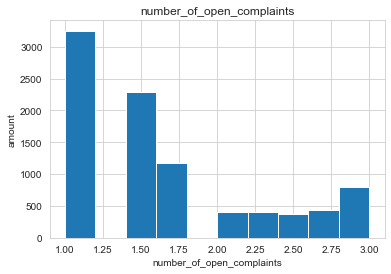

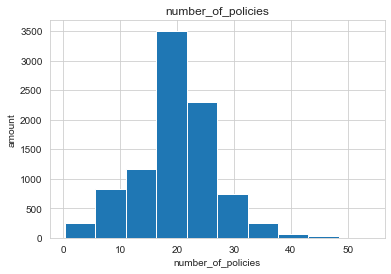

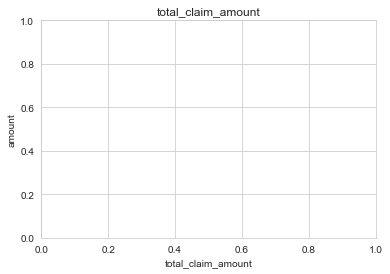

In [165]:
for col in numericals:
    pd.Series(map(sqrt_transfom_clean_, numericals[col])).hist()
    plt.show()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('amount')

###### The first transformation seems to yield better results with the continuous variables and the second with the discrete ones

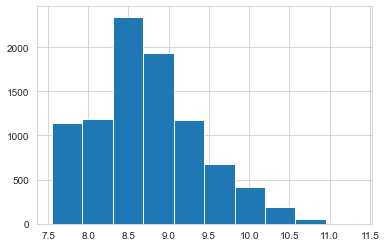

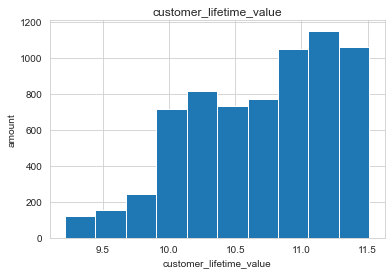

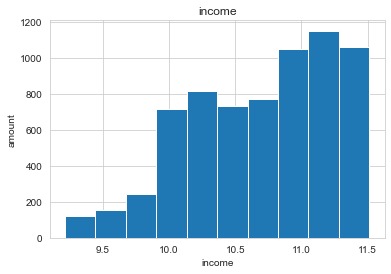

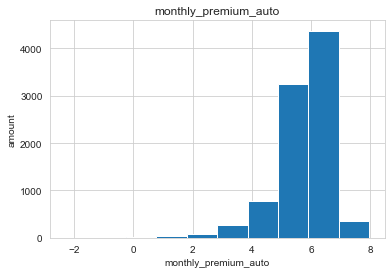

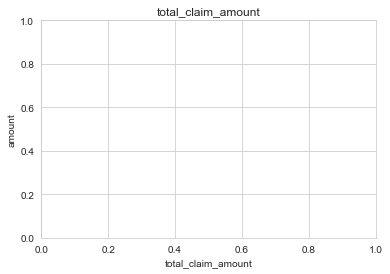

In [162]:
for col in continuous_df:
    pd.Series(map(log_transfom_clean_, continuous_df[col])).hist()
    plt.show()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('amount')

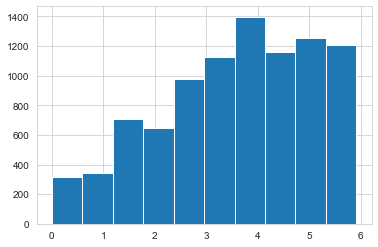

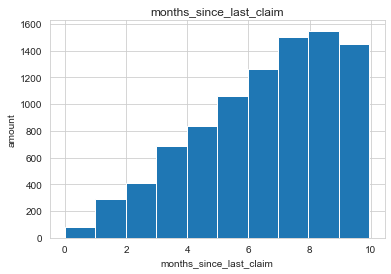

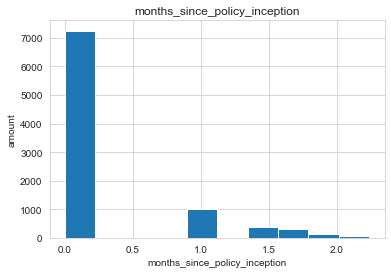

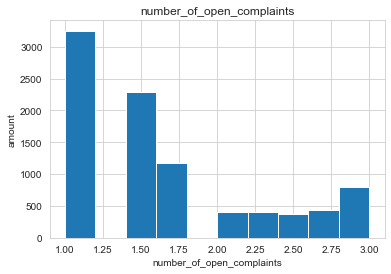

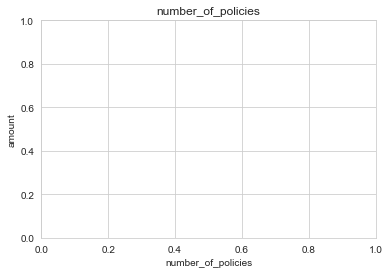

In [164]:
for col in discrete_df:
    pd.Series(map(sqrt_transfom_clean_, discrete_df[col])).hist()
    plt.show()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('amount')